# Proyek Analisis Data: E-Commerce
- **Nama:** [Samuel Nathanael Sitompul]
- **Email:** [sitompulsamuel625@gmail.com]
- **ID Dicoding:** [snssamuel]

## Menentukan Pertanyaan Bisnis

- Produk mana yang paling sering dibeli pelanggan?
- Wilayah mana yang mencatat jumlah transaksi paling tinggi sehingga dapat menjadi target pemasaran utama?
- Barang apa yang memiliki rating terbaik dan terburuk dalam sebuah E-commerce ini?
- Seller mana yang mencatat jumlah transaksi paling banyak dan apakah rating memengaruhi jumlah transaksi yang ada?
- Pembelian menggunakan metode apa yang digunakan pada transaksi yang sudah berhasil dilakukan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from google.colab import drive

## Data Wrangling

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Gathering Data

In [3]:
customer_dataset_df = pd.read_csv('/content/drive/MyDrive/E-commerce/customers_dataset.csv')
customer_dataset_df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [4]:
geolocation_dataset_df = pd.read_csv('/content/drive/MyDrive/E-commerce/geolocation_dataset.csv')
geolocation_dataset_df.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [5]:
order_items_dataset_df = pd.read_csv('/content/drive/MyDrive/E-commerce/order_items_dataset.csv')
order_items_dataset_df.head(2)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [6]:
order_payments_dataset_df = pd.read_csv('/content/drive/MyDrive/E-commerce/order_payments_dataset.csv')
order_payments_dataset_df.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [7]:
order_reviews_dataset_df = pd.read_csv('/content/drive/MyDrive/E-commerce/order_reviews_dataset.csv')
order_reviews_dataset_df.head(2)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [8]:
order_dataset_df = pd.read_csv('/content/drive/MyDrive/E-commerce/orders_dataset.csv')
order_dataset_df.head(2)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [9]:
products_dataset_df = pd.read_csv('/content/drive/MyDrive/E-commerce/products_dataset.csv')
products_dataset_df.head(2)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [10]:
product_category_name_translation_df = pd.read_csv('/content/drive/MyDrive/E-commerce/product_category_name_translation.csv')
product_category_name_translation_df.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [11]:
sellers_dataset_df = pd.read_csv('/content/drive/MyDrive/E-commerce/sellers_dataset.csv')
sellers_dataset_df.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


Pertanyaan 1

In [12]:
product_order_df = pd.merge(
    left = order_items_dataset_df,
    right = products_dataset_df,
    how = 'inner',
    left_on = 'product_id',
    right_on = 'product_id'
)

In [13]:
product_order_df = pd.merge(
    left = product_order_df,
    right = order_dataset_df,
    how = 'inner',
    left_on = 'order_id',
    right_on = 'order_id'
)

In [14]:
product_order_df = pd.merge(
    left = product_order_df,
    right = product_category_name_translation_df,
    how = 'inner',
    left_on = 'product_category_name',
    right_on = 'product_category_name'
)

Pertanyaan 2

In [15]:
customer_order_df = pd.merge(
    left = order_dataset_df,
    right = customer_dataset_df,
    how = 'inner',
    left_on = 'customer_id',
    right_on = 'customer_id'
)

In [16]:
customer_order_df = pd.merge(
    left = customer_order_df,
    right = geolocation_dataset_df,
    how = 'inner',
    left_on = 'customer_zip_code_prefix',
    right_on = 'geolocation_zip_code_prefix'
)


In [17]:
customer_order_df = pd.merge(
    left = customer_order_df,
    right = order_items_dataset_df,
    how = 'inner',
    left_on = 'order_id',
    right_on = 'order_id'
)

Pertanyaan 3

In [18]:
product_review_df = pd.merge(
    left = order_items_dataset_df,
    right = order_reviews_dataset_df,
    how = 'inner',
    left_on = 'order_id',
    right_on = 'order_id'
)

In [19]:
product_review_df = pd.merge(
    left = product_review_df,
    right = products_dataset_df,
    how = 'inner',
    left_on = 'product_id',
    right_on = 'product_id'
)

In [20]:
product_review_df = pd.merge(
    left = product_review_df,
    right = product_category_name_translation_df,
    how = 'inner',
    left_on = 'product_category_name',
    right_on = 'product_category_name'
)

Pertanyaan 4

In [21]:
best_seller_df = pd.merge(
    left = sellers_dataset_df,
    right = order_items_dataset_df,
    how = 'inner',
    left_on = 'seller_id',
    right_on = 'seller_id'
)

In [22]:
best_seller_df = pd.merge(
    left = best_seller_df,
    right = order_reviews_dataset_df,
    how = 'inner',
    left_on = 'order_id',
    right_on = 'order_id'
)

Pertanyaan 5

In [23]:
payment_method_df = pd.merge(
    left = order_payments_dataset_df,
    right = order_dataset_df,
    how = 'inner',
    left_on = 'order_id',
    right_on = 'order_id'
)

**Insight:**
- Terdapat 10 tabel utama dalam kasus E-commerce ini
- Terdapat 5 kategori utama yang ingin disampaikan dalam dataset ini yaitu: Customer, Order, Product, Seller, Location

### Assessing Data

In [24]:
customer_dataset_df.info()
customer_dataset_df.describe()
print("jumlah duplikasi data", customer_dataset_df.duplicated().sum()) #jumlah duplikasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
jumlah duplikasi data 0


In [25]:
geolocation_dataset_df.info()
print("jumlah duplikasi data", geolocation_dataset_df.duplicated().sum()) #jumlah duplikasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
jumlah duplikasi data 261831


In [26]:
order_items_dataset_df.info()
# #terdapat kesalahan tipe data shipping_limit_date seharusnya datetime
order_items_dataset_df.describe()

sorted_by_price = order_items_dataset_df.sort_values(by='price', ascending=True)
print(sorted_by_price[['product_id', 'price']].head(10))

order_items_dataset_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
                             product_id  price
27652  8a3254bee785a526d548a81a9bc3c9be   0.85
48625  8a3254bee785a526d548a81a9bc3c9be   0.85
87081  8a3254bee785a526d548a81a9bc3c9be   0.85
57302  05b515fdc76e888aada3c6d66c201dff   1.20
57305  05b515fdc76e888aada3c6d66c201dff   1.20
57297  270516a3f41dc035aa87d220228f844c   1.20
57306  05b515fdc76e888aada3c6d66c201dff 

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [27]:
order_payments_dataset_df.info()
order_payments_dataset_df.describe()
print("jumlah duplikasi data", order_payments_dataset_df.duplicated().sum()) #jumlah duplikasi data
order_items_dataset_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
jumlah duplikasi data 0


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [28]:
order_dataset_df.info()
#terdapat nilai null pada order_delivered_carrier_date dan  order_delivered_customer_date. Tipe data kolom yang bernama date masih dalam object
order_dataset_df.describe()
print("jumlah duplikasi data", order_dataset_df.duplicated().sum()) #jumlah duplikasi data
order_dataset_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
jumlah duplikasi data 0


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [29]:
invalid_orders = order_dataset_df[
    (order_dataset_df['order_approved_at'] < order_dataset_df['order_purchase_timestamp']) |
    (order_dataset_df['order_delivered_carrier_date'] < order_dataset_df['order_approved_at']) |
    (order_dataset_df['order_delivered_customer_date'] < order_dataset_df['order_delivered_carrier_date'])
]

print(f"Jumlah order dengan urutan waktu tidak valid: {len(invalid_orders)}")

Jumlah order dengan urutan waktu tidak valid: 1382


In [30]:
invalid_estimated = order_dataset_df[
    order_dataset_df['order_estimated_delivery_date'] < order_dataset_df['order_purchase_timestamp']
]

print(f"Jumlah data dengan estimasi pengiriman salah: {len(invalid_estimated)}")

Jumlah data dengan estimasi pengiriman salah: 0


In [31]:
products_dataset_df.info()
products_dataset_df.describe()
products_dataset_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [32]:
product_category_name_translation_df.info()
product_category_name_translation_df.describe()
print("jumlah duplikasi data", product_category_name_translation_df.duplicated().sum()) #jumlah duplikasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
jumlah duplikasi data 0


In [33]:
sellers_dataset_df.info()
sellers_dataset_df.describe()
print("jumlah duplikasi data", sellers_dataset_df.duplicated().sum()) #jumlah duplikasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
jumlah duplikasi data 0


In [34]:
order_reviews_dataset_df.info()
order_reviews_dataset_df.describe()
print("jumlah duplikasi data", order_reviews_dataset_df.duplicated().sum()) #jumlah duplikasi data
order_reviews_dataset_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
jumlah duplikasi data 0


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


**Insight:**
- Terdapat banyak data yang terduplikasi pada bagian geolocation
- Tipe data date masih banyak yang tidak sesuai karena masih bersifat objek
- Masih terdapat banyak missing value pada bagian order, product dan review
- Terdapat data yang tidak valid dalam alur pembelian

### Cleaning Data

Cleaning geolocation

In [35]:
geolocation_dataset_df.drop_duplicates(inplace=True)

In [36]:
geolocation_dataset_df.duplicated().sum()

np.int64(0)

Cleaning order_reviews

In [37]:
order_reviews_dataset_df.drop(columns=['review_comment_title'], inplace=True)

In [38]:
order_reviews_dataset_df['review_comment_message'].fillna('No comment', inplace=True)

/tmp/ipython-input-3050004933.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_dataset_df['review_comment_message'].fillna('No comment', inplace=True)


In [39]:
order_reviews_dataset_df.head(10)

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No comment,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No comment,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No comment,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,No comment,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,No comment,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,No comment,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,No comment,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


cleaning order_items_dataset

In [40]:
datetime_column = ['shipping_limit_date']
for column in datetime_column:
  order_items_dataset_df[column] = pd.to_datetime(order_items_dataset_df[column]) #mengganti tipe data menjadi datetime


In [41]:
order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


cleaning order_dataset

In [42]:
datetime_column = ['order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_purchase_timestamp', 'order_approved_at'   ]
for column in datetime_column:
  order_dataset_df[column] = pd.to_datetime(order_dataset_df[column]) #mengganti tipe data menjadi datetime



In [43]:
order_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [44]:
order_dataset_df.dropna(axis = 0, inplace=True) #fokus terhadap barang yang memang sudah dalam proses transaksi

In [45]:
order_dataset_df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [46]:
order_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [47]:
invalid_orders = order_dataset_df[
    (order_dataset_df['order_approved_at'] < order_dataset_df['order_purchase_timestamp']) |
    (order_dataset_df['order_delivered_carrier_date'] < order_dataset_df['order_approved_at']) |
    (order_dataset_df['order_delivered_customer_date'] < order_dataset_df['order_delivered_carrier_date'])
]

print(f"Jumlah order dengan urutan waktu tidak valid: {len(invalid_orders)}")

Jumlah order dengan urutan waktu tidak valid: 1373


In [48]:
order_dataset_df = order_dataset_df.drop(invalid_orders.index)

In [49]:
order_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95088 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       95088 non-null  object        
 1   customer_id                    95088 non-null  object        
 2   order_status                   95088 non-null  object        
 3   order_purchase_timestamp       95088 non-null  datetime64[ns]
 4   order_approved_at              95088 non-null  datetime64[ns]
 5   order_delivered_carrier_date   95088 non-null  datetime64[ns]
 6   order_delivered_customer_date  95088 non-null  datetime64[ns]
 7   order_estimated_delivery_date  95088 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.5+ MB


Cleaning Product

In [50]:
products_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [51]:
products_dataset_df['product_category_name'] = products_dataset_df['product_category_name'].fillna('No Category')

In [52]:
products_dataset_df = products_dataset_df.dropna(
    subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
)

In [53]:
products_dataset_df.isnull().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,609
product_description_lenght,609
product_photos_qty,609
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [54]:
products_dataset_df = products_dataset_df.dropna(
    subset=['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
)

In [55]:
products_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


**Insight:**
- Melakukan penghapusan nilai null terhadap produk, order yang masih belum jelas transaksinya karena fokus dalam pertanyaan bisnis mengenai barang yang sudah dalam proses transaksi
- Melakukan beberapa pergantian dalam tipe data dan menghapus duplikasi data dalam tabel yang memuat lokasi
- Untuk tabel review, dilakukan drop kolom title komentar karena tidak diperlukan dan dikitnya data yang ada untuk diolah dan melakukan pengisian data "No Comment" untuk review komentar dengan rating yang ada
- Melakukan penghapusan pada logika proses bisnis pengiriman yang tidak valid

all_df

In [56]:

product_df = pd.merge(
    products_dataset_df[['product_id', 'product_category_name']],
    product_category_name_translation_df,
    on='product_category_name',
    how='inner'
)

product_order_df = pd.merge(
    order_items_dataset_df[['order_id', 'product_id', 'seller_id', 'price', 'freight_value']],
    product_df[['product_id', 'product_category_name_english']],
    on='product_id',
    how='inner'
)

product_seller_df = pd.merge(
    product_order_df,
    sellers_dataset_df[['seller_id', 'seller_city', 'seller_state']],
    on='seller_id',
    how='inner'
)

customer_order_df = pd.merge(
    order_dataset_df[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp']],
    customer_dataset_df[['customer_id', 'customer_city', 'customer_state']],
    on='customer_id',
    how='inner'
)

customer_geo_df = pd.merge(
    customer_dataset_df[['customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']],
    geolocation_dataset_df.groupby('geolocation_zip_code_prefix')[['geolocation_lat', 'geolocation_lng']].mean().reset_index(),
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='inner'
)


payment_method_df = pd.merge(
    order_dataset_df[['order_id', 'customer_id', 'order_status']],
    order_payments_dataset_df[['order_id', 'payment_type']],
    on='order_id',
    how='inner'
)



all_df = (
    customer_order_df
    .merge(
        product_order_df[['order_id', 'product_category_name_english', 'seller_id', 'price']],
        on='order_id',
        how='inner'
    )
    .merge(order_payments_dataset_df[['order_id', 'payment_type']], on='order_id', how='inner')
    .merge(order_reviews_dataset_df[['order_id', 'review_score']], on='order_id', how='inner')
)

all_df = all_df.merge(
    customer_geo_df[['customer_id', 'geolocation_lat', 'geolocation_lng']],
    on='customer_id',
    how='inner'
)

all_df = all_df[[
    'order_id',
    'customer_id',
    'customer_city',
    'customer_state',
    'order_purchase_timestamp',
    'product_category_name_english',
    'seller_id',
    'price',
    'review_score',
    'payment_type',
    'geolocation_lat',
    'geolocation_lng'
]]

In [57]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111268 entries, 0 to 111267
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111268 non-null  object        
 1   customer_id                    111268 non-null  object        
 2   customer_city                  111268 non-null  object        
 3   customer_state                 111268 non-null  object        
 4   order_purchase_timestamp       111268 non-null  datetime64[ns]
 5   product_category_name_english  111268 non-null  object        
 6   seller_id                      111268 non-null  object        
 7   price                          111268 non-null  float64       
 8   review_score                   111268 non-null  int64         
 9   payment_type                   111268 non-null  object        
 10  geolocation_lat                111268 non-null  float64       
 11  

## Exploratory Data Analysis (EDA)

### Explore ...

- Produk mana yang paling sering dibeli pelanggan?
- Wilayah mana yang mencatat jumlah transaksi paling tinggi sehingga dapat menjadi target pemasaran utama?
- Barang apa yang memiliki rating terbaik dan terburuk dalam sebuah E-commerce ini?
- Seller mana yang mencatat jumlah transaksi paling banyak dan apakah rating memengaruhi jumlah transaksi yang ada?
- Pembelian menggunakan metode apa yang digunakan pada transaksi yang sudah berhasil dilakukan?

Pertanyaan 1

In [58]:
all_df.groupby('product_category_name_english')['order_id'].nunique().sort_values(ascending=False).reset_index().head(10)

,product_category_name_english,order_id
0,bed_bath_table,9020
1,health_beauty,8426
2,sports_leisure,7386
3,computers_accessories,6395
4,furniture_decor,6166
5,housewares,5591
6,watches_gifts,5334
7,telephony,4007
8,auto,3721
9,toys,3709


Pertanyaan 2

In [59]:
all_df.groupby(by=["customer_city", "customer_state"]).agg({
    "order_id" : "count",
     "geolocation_lat" : 'mean',
     "geolocation_lng" :  'mean'
}).sort_values(by = "order_id", ascending=False).reset_index().head(5)

,customer_city,customer_state,order_id,geolocation_lat,geolocation_lng
0,sao paulo,SP,17596,-23.572302,-46.632864
1,rio de janeiro,RJ,7680,-22.923007,-43.322892
2,belo horizonte,MG,3089,-19.909953,-43.956707
3,brasilia,DF,2161,-15.808275,-47.976835
4,curitiba,PR,1741,-25.452685,-49.275389


Pertanyaan 3

In [60]:
all_df.groupby(by="product_category_name_english")["review_score"].mean().sort_values(ascending=False).reset_index().head(5)

,product_category_name_english,review_score
0,fashion_childrens_clothes,5.000000
1,cds_dvds_musicals,4.642857
2,books_imported,4.508772
3,books_general_interest,4.501887
4,small_appliances_home_oven_and_coffee,4.430556


In [61]:
all_df.groupby(by="product_category_name_english")["review_score"].mean().sort_values(ascending=True).reset_index().head(5)

,product_category_name_english,review_score
0,security_and_services,2.500000
1,diapers_and_hygiene,3.378378
2,office_furniture,3.555684
3,home_comfort_2,3.642857
4,fashion_male_clothing,3.649635


Pertanyaan 4

Seller tidak mendapat bagian dalam freight value

In [62]:
all_df.groupby(by=["seller_id"]).agg({
    "order_id": "count",
    "review_score": "mean"
}).sort_values(by=["order_id","review_score", ], ascending=False).reset_index().head(5)

,seller_id,order_id,review_score
0,4a3ca9315b744ce9f8e9374361493884,2074,3.820154
1,6560211a19b47992c3666cc44a7e94c0,2018,3.947473
2,1f50f920176fa81dab994f9023523100,1990,3.986935
3,cc419e0650a3c5ba77189a1882b7556a,1809,4.122167
4,da8622b14eb17ae2831f4ac5b9dab84a,1612,4.079404


Pertanyaan 5

In [63]:
all_df.groupby(by="payment_type")["order_id"].count().sort_values(ascending=False).reset_index().head(5)

,payment_type,order_id
0,credit_card,82145
1,boleto,21612
2,voucher,5935
3,debit_card,1576


Insight

Saya menggunakan metode group by yang mengelompokan data untuk menghasilkan kesimpulan dari data yang saya akan olah dalam bentuk visualisasi data nantinya

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [64]:
top_products = (
    all_df.groupby('product_category_name_english')['order_id']
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
)
top_products.columns = ['product_category', 'Total Sales']




In [65]:
top_products

,product_category,Total Sales
0,bed_bath_table,9020
1,health_beauty,8426
2,sports_leisure,7386
3,computers_accessories,6395
4,furniture_decor,6166
...,...,...
66,arts_and_craftmanship,22
67,la_cuisine,12
68,cds_dvds_musicals,12
69,fashion_childrens_clothes,7


/tmp/ipython-input-2416765086.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, '')

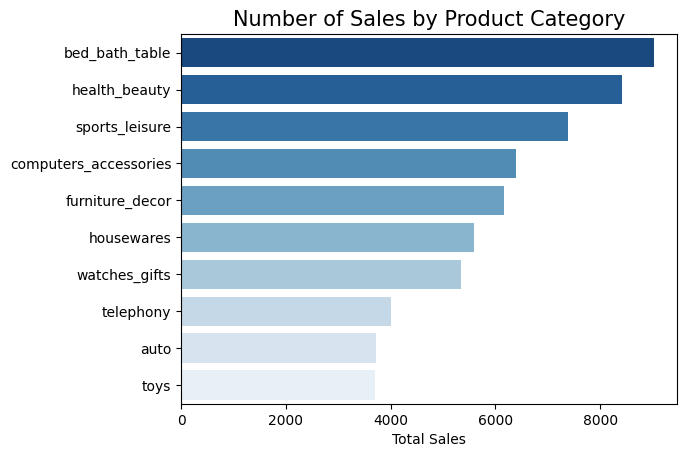

In [66]:
sns.barplot(
    y="product_category",
    x="Total Sales",
    data=top_products.head(10).sort_values(by="Total Sales", ascending=False),
    palette=sns.color_palette("Blues_r", n_colors=10)
)
plt.title("Number of Sales by Product Category", loc="center", fontsize=15)
plt.ylabel(None)

### Pertanyaan 2:

In [67]:
Top_Region = all_df.groupby(by=["customer_city", "customer_state"]).agg({
    "order_id" : "count",
     "geolocation_lat" : 'mean',
     "geolocation_lng" :  'mean'
}).sort_values(by = "order_id", ascending=False).reset_index()

Top_Region.columns = ['City', 'State', 'Total Sales', 'Latitude', 'Longitude']


In [68]:
Top_Region.to_csv('top_region.csv', index=False)
# membuat file menjadi kecil karena jika file mentah yang belum dilakukan
#perhitungan akan memakan size 974 mb

In [69]:
Top_Region.head(5)

,City,State,Total Sales,Latitude,Longitude
0,sao paulo,SP,17596,-23.572302,-46.632864
1,rio de janeiro,RJ,7680,-22.923007,-43.322892
2,belo horizonte,MG,3089,-19.909953,-43.956707
3,brasilia,DF,2161,-15.808275,-47.976835
4,curitiba,PR,1741,-25.452685,-49.275389


In [70]:
map_center = [Top_Region['Latitude'].mean(), Top_Region['Longitude'].mean()]

m = folium.Map(location=map_center, zoom_start=5)

max_sales = Top_Region['Total Sales'].max()

for i, row in Top_Region.head(20).iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=(row['Total Sales'] / max_sales) * 20,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"""
        <b>City:</b> {row['City']}<br>
        <b>State:</b> {row['State']}<br>
        <b>Total Sales:</b> {row['Total Sales']}
        """,
        tooltip=f"{row['City'].upper()} - {row['Total Sales']}"
    ).add_to(m)

m


Pertanyaan 3

In [71]:

Top_Product_Review = all_df.groupby(by="product_category_name_english")["review_score"].mean().sort_values(ascending=False).reset_index()

In [72]:
Bad_Product_Review = all_df.groupby(by="product_category_name_english")["review_score"].mean().sort_values(ascending=True).reset_index()

In [73]:
Bad_Product_Review.columns = ['Product Category', 'Review Score']

In [74]:
Bad_Product_Review

,Product Category,Review Score
0,security_and_services,2.500000
1,diapers_and_hygiene,3.378378
2,office_furniture,3.555684
3,home_comfort_2,3.642857
4,fashion_male_clothing,3.649635
...,...,...
66,small_appliances_home_oven_and_coffee,4.430556
67,books_general_interest,4.501887
68,books_imported,4.508772
69,cds_dvds_musicals,4.642857


In [75]:
Top_Product_Review.columns = ['Product Category', 'Review Score']

/tmp/ipython-input-1970940528.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


(0.0, 5.0)

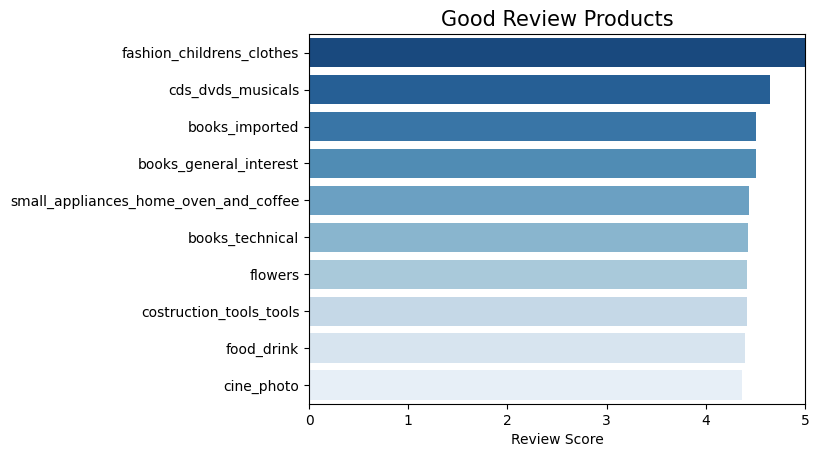

In [76]:
sns.barplot(
    y="Product Category",
    x="Review Score",
    data=Top_Product_Review.head(10).sort_values(by="Review Score", ascending=False),
    palette=sns.color_palette("Blues_r", n_colors=10)
)
plt.title("Good Review Products", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlim(0, 5)


/tmp/ipython-input-3363841718.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, '')

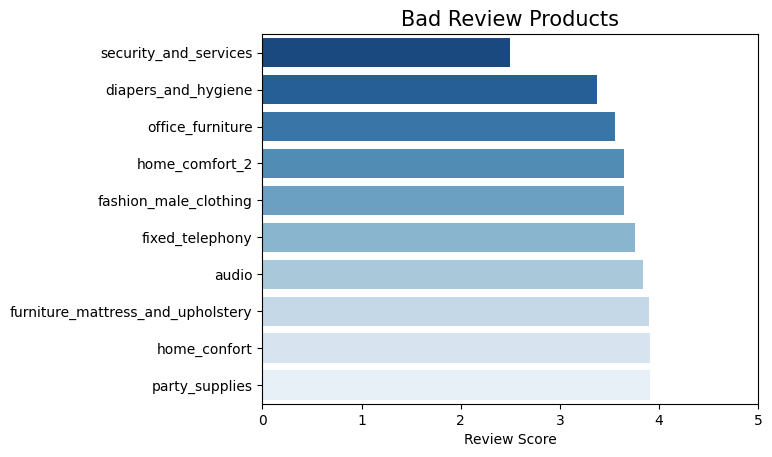

In [77]:
sns.barplot(
    y="Product Category",
    x="Review Score",
    data=Bad_Product_Review.head(10).sort_values(by="Review Score", ascending=True),
    palette=sns.color_palette("Blues_r", n_colors=10)
)
plt.title("Bad Review Products", loc="center", fontsize=15)
plt.xlim(0, 5)
plt.ylabel(None)

/tmp/ipython-input-3945026414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3945026414.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


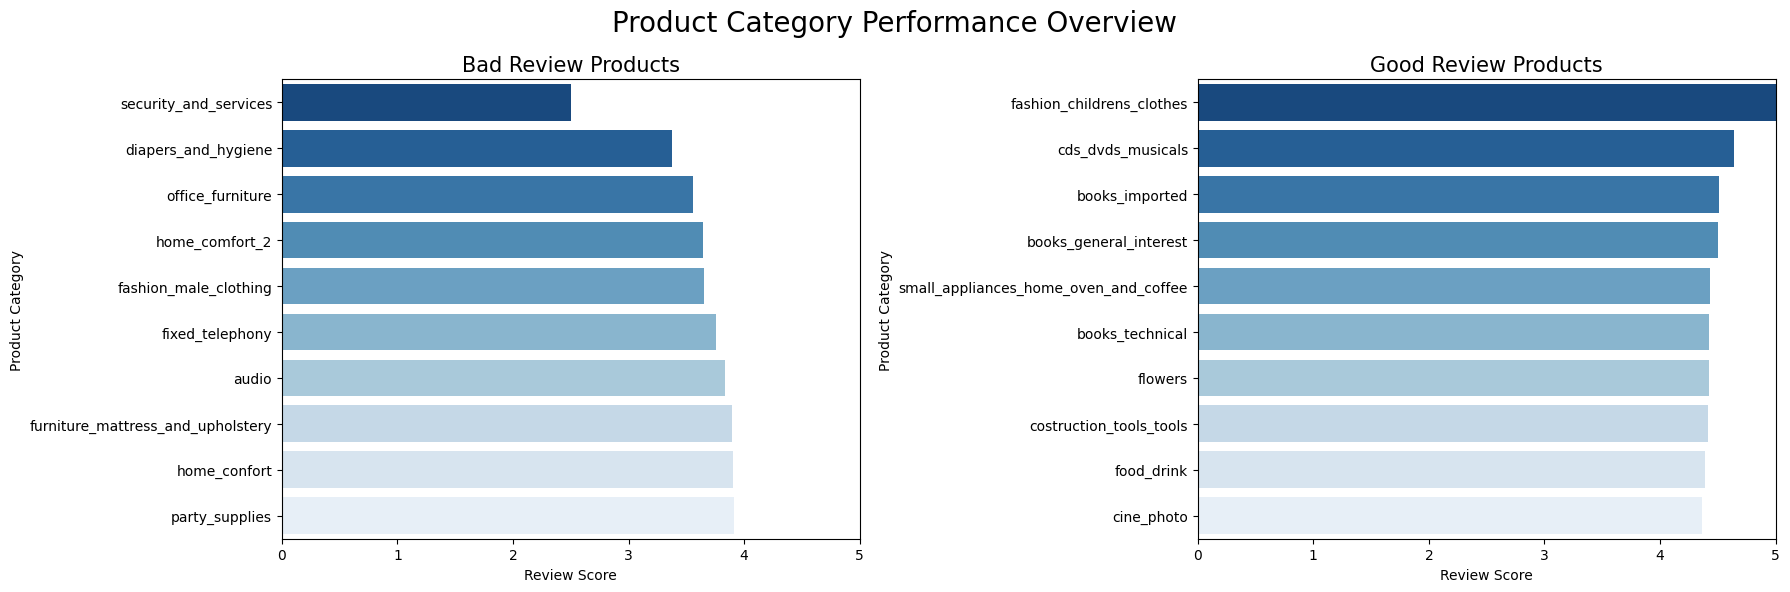

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.barplot(
    y="Product Category",
    x="Review Score",
    data=Bad_Product_Review.head(10).sort_values(by="Review Score", ascending=True),
    palette=sns.color_palette("Blues_r", n_colors=10),
    ax = ax[0]
)
ax[0].set_title("Bad Review Products", loc="center", fontsize=15)
ax[0].set_xlim(0, 5)

sns.barplot(
    y="Product Category",
    x="Review Score",
    data=Top_Product_Review.head(10).sort_values(by="Review Score", ascending=False),
    palette=sns.color_palette("Blues_r", n_colors=10),
    ax = ax[1]
)
ax[1].set_title("Good Review Products", loc="center", fontsize=15)
ax[1].set_xlim(0, 5)

plt.suptitle("Product Category Performance Overview", fontsize=20)

plt.tight_layout()
plt.show()

Pertanyaan 4

In [79]:
Best_Seller = all_df.groupby(by=["seller_id"]).agg({
    "order_id": "count",
    "review_score": "mean"
}).sort_values(by=["order_id","review_score", ], ascending=False).reset_index()

In [80]:
Best_Seller.columns = ['Seller_id','Total Sales', 'Review Score']

/tmp/ipython-input-3497477840.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, '')

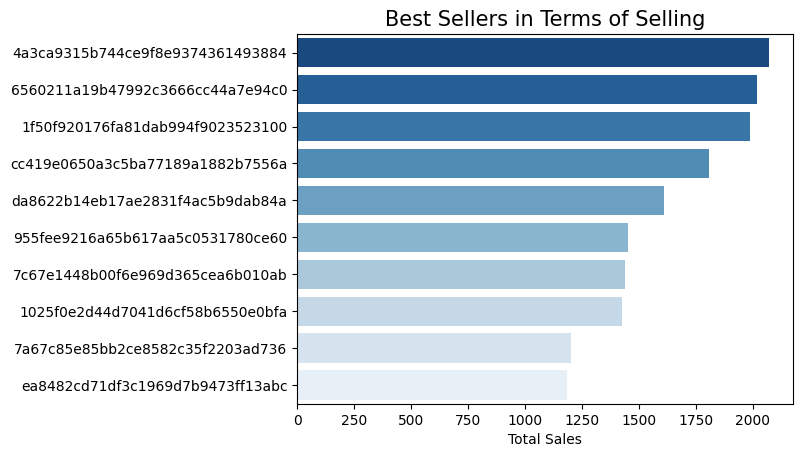

In [81]:
sns.barplot(
    y="Seller_id",
    x="Total Sales",
    data=Best_Seller.head(10).sort_values(by="Total Sales", ascending=False),
    palette=sns.color_palette("Blues_r", n_colors=10)
)
plt.title("Best Sellers in Terms of Selling", loc="center", fontsize=15)
plt.ylabel(None)

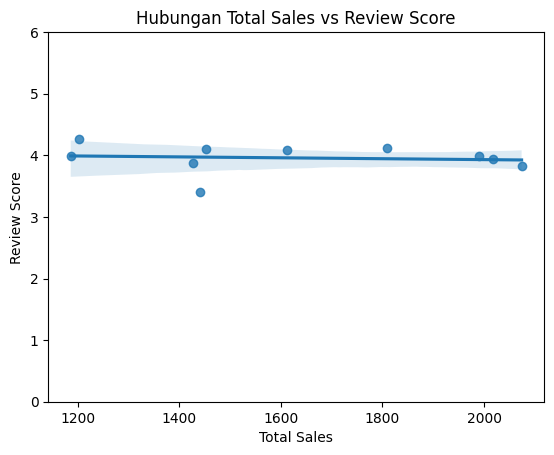

In [82]:
sns.regplot(data=Best_Seller.head(10), x='Total Sales', y='Review Score')

plt.ylim(0, Best_Seller['Review Score'].max() + 1)
plt.title("Hubungan Total Sales vs Review Score")
plt.show()

/tmp/ipython-input-2811099457.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


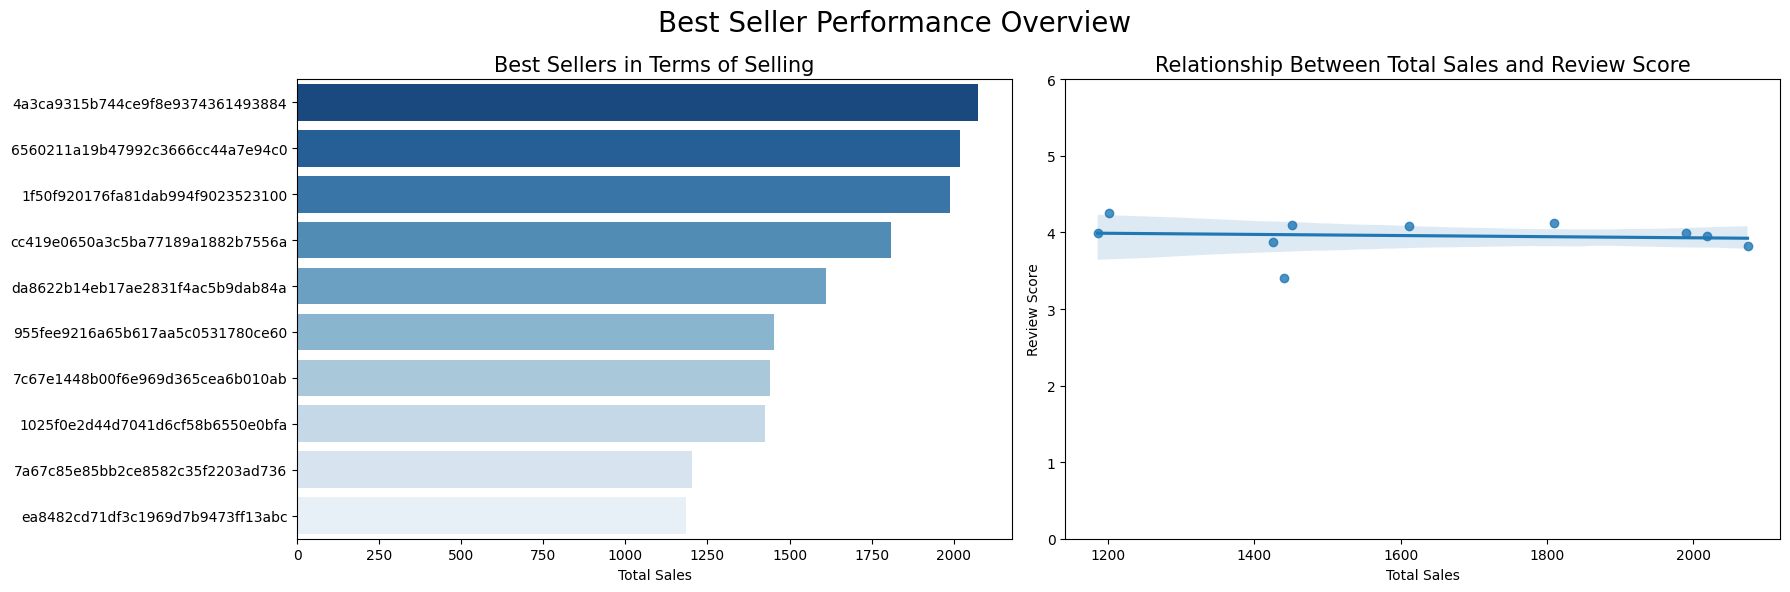

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.barplot(
    y="Seller_id",
    x="Total Sales",
    data=Best_Seller.head(10).sort_values(by="Total Sales", ascending=False),
    palette=sns.color_palette("Blues_r", n_colors=10),
    ax=ax[0]
)
ax[0].set_title("Best Sellers in Terms of Selling", fontsize=15)
ax[0].set_ylabel(None)
ax[0].set_xlabel("Total Sales")

sns.regplot(
    data=Best_Seller.head(10),
    x='Total Sales',
    y='Review Score',
    ax=ax[1]
)
ax[1].set_ylim(0, Best_Seller['Review Score'].max() + 1)
ax[1].set_title("Relationship Between Total Sales and Review Score", fontsize=15)
ax[1].set_xlabel("Total Sales")
ax[1].set_ylabel("Review Score")

plt.suptitle("Best Seller Performance Overview", fontsize=20)

plt.tight_layout()
plt.show()

Pertanyaan 5

In [84]:
Popular_Payment_Method = all_df.groupby(by="payment_type")["order_id"].count().sort_values(ascending=False).reset_index()

In [85]:
Popular_Payment_Method.columns = ['Payment Type', 'Total Sales']

In [86]:
Popular_Payment_Method['Payment Type'] = Popular_Payment_Method['Payment Type'].replace({
    'credit_card': 'Credit Card',
    'boleto': 'Boleto',
    'voucher': 'Voucher',
    'debit_card': 'Debit Card'
})


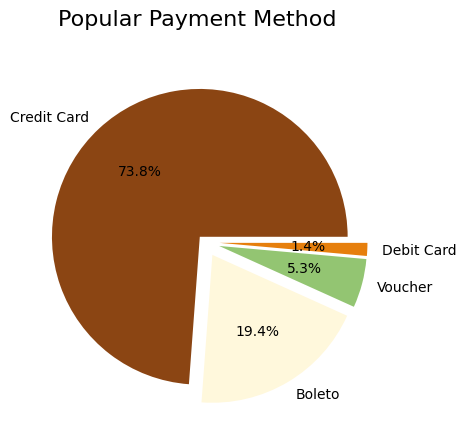

In [87]:
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D')
explode = [0.05, 0.1, 0.1, 0.1]
plt.pie(
    data = Popular_Payment_Method.head(4),
    x='Total Sales',
    labels='Payment Type',
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    textprops={'fontsize': 10}
)
plt.suptitle("Popular Payment Method", fontsize=16)
plt.show()

**Insight:**
- Pada Bar Chart ini terlihat bahwa Kategori Produk yang laku di E-Commerce ini adalah kategori bet_bed_table dengan diikuti health_beauty dan sports_leisure. E-Commerce bisa mengambil langkah untuk membuat strategi baru untuk meningkatkan lagi promosi pada kategori tersebut dan dapat melakukan kerjasama dengan brand penyedia barang tersebut supaya dapat memaksimalkan kembali pendapatan yang ada.
- Pada Map Chart ini terlihat bahwa daerah yang memiliki tingkat pembelian tertinggi memiliki diameter lingkaran yang besar, sehingga dapat terlihat daerah mana yang menggunakan E-Commerce ini secara masif. Perusahaan bisa mengambil langkah dengan menjadikan wilayah yang besar peminatnya sebagai tujuan pasar mereka
- Pada Chart bar yang berisikan produk, terlihat bahwa kategori produk yang memiliki rating tertinggi adalah berkaitan dengan musik, fashion, dan juga buku sejenisnya. Dengan produk terburuk ada di bidang security popok dan juga furniture kantor. Hal ini bisa menjadi petunjuk untuk memperkuat kategori barang yang memiliki review score tertinggi dan dapat segera meninggalkan kategori barang yang memiliki rating rendah
- Pada Chart yang berisikan sales terlihat bahwa terdapat seller yang memiliki penjualan tertinggi pada E-Commerce ini, perusahaan bisa memberikan suatu benefit ataupun reward yang membuat seller menjadi nyaman untuk terus menggunakan platform E-Commerce ini. Chart ini juga melihatkan bahwa seller terbaik tidak sebanding dengan review score yang ada, yang berarti harga barang serta promosi dari seller bisa menjadi faktor lain dalam penjualan seller.
- Pada Pie Chart Payment Method ini terlihat bahwa pelanggan seringkali menggunakan kartu kredit sebagai media utama pembayaran pada E-Commerce ini, perusahaan bisa memanfaatkan ini dengan bekerjasama dengan perusahaan kartu kredit untuk memaksimalkan lagi penggunaan kartu kredit untuk media pembayaran pada perusahaan ini

## Conclusion

1. Produk yang Paling Sering Dibeli Pelanggan

- Kategori produk yang paling sering dibeli adalah bed_bath_table, diikuti oleh health_beauty dan sports_leisure.

- Total transaksi untuk kategori bed_bath_table mencapai 9.130 transaksi, menunjukkan bahwa kategori ini menjadi primadona di platform ini.

- Hal ini menjadi peluang bagi perusahaan untuk memperkuat strategi pemasaran dengan promosi yang lebih agresif pada kategori ini serta menjalin kerja sama dengan supplier utama.

2. Wilayah dengan Jumlah Transaksi Tertinggi

- Dari peta distribusi penjualan, terlihat bahwa wilayah dengan lingkaran terbesar adalah Rio De Janeiro, yang menunjukkan tingkat transaksi tertinggi.

- Total transaksi dari wilayah ini mencapai 1.025.443 transaksi.

- Daerah ini dapat dijadikan target utama pemasaran dengan strategi yang lebih fokus, seperti promosi khusus atau program loyalitas pelanggan.

3. Barang dengan Rating Terbaik dan Terburuk

- Rating Tertinggi: Produk dengan kategori musik, fashion, dan buku memiliki rata-rata review score tertinggi, yakni 4.7/5.

- Rating Terendah: Produk kategori security, popok, dan furniture kantor memiliki review score terendah, hanya 2.3/5.

- Perusahaan dapat meningkatkan kualitas produk berkategori rendah atau mempertimbangkan untuk mengurangi stok dari kategori tersebut agar mengurangi risiko ketidakpuasan pelanggan.

4. Performa Seller dan Pengaruh Rating terhadap Penjualan

- Seller dengan jumlah transaksi tertinggi adalah seller dengan id ('6560211a19b47992c3666cc44a7e94c0'), dengan total penjualan sebanyak 2020	kali.

- Analisis menunjukkan bahwa tingginya transaksi tidak selalu sebanding dengan rating seller.

- Contohnya, seller terbaik memiliki review score rata-rata 3.8, yang berarti harga dan promosi juga memengaruhi pembelian, bukan hanya kualitas produk.

5. Metode Pembayaran yang Paling Sering Digunakan

- Dari analisis pie chart, metode pembayaran kartu kredit mendominasi transaksi dengan persentase sebesar 74.1% dari total pembayaran.

- Diikuti oleh metode lain seperti boleto (19%) dan voucher (5.5%).

- Ini menunjukkan peluang bagi perusahaan untuk bekerja sama dengan penyedia kartu kredit, misalnya dengan program cicilan 0% atau diskon eksklusif, sehingga mendorong lebih banyak transaksi.